In [ ]:
import pandas as pd
import numpy as np

# Helper Functions
import wrangle as w 
import explore as exp
from explore import rfe, split, select_kbest

# Visualizations
import seaborn as sns
import matplotlib.pyplot as plt

# Hypothesis tests
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind

#Feature Engineering
from sklearn.feature_selection import SelectKBest, f_regression, chi2
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.feature_selection import RFE
from scipy import stats

# Split data
from sklearn.model_selection import train_test_split

# Evaluate models
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support 

# Create models for classification ML:
# Decision Tree  
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

# Random Forest
from sklearn.ensemble import RandomForestClassifier

# K-Nearest Neighbor(KNN)  
from sklearn.neighbors import KNeighborsClassifier

# Logistic Regression
from sklearn.linear_model import LogisticRegression

In [ ]:
df = w.wrangle_data(cached=True)

In [ ]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [ ]:
df.isnull().sum()

age                                            0
gender                                         0
race                                           0
date                                           0
city                                           0
state                                          0
zipcode                                        0
county                                         0
agency_responsible                             0
cause_of_death                                 0
description_of_circumstances                   0
official_disposition                           0
criminal_charges_filed                         0
mental_illness                                 0
armed_unarmed_status                           0
alleged_weapon                                 0
alleged_threat_lvl                             0
fleeing                                        0
body_camera                                    0
geography                                      0
encounter_type_draft

In [ ]:
df.age.value_counts()

25     280
0      279
27     275
28     275
31     275
      ... 
88       1
93       1
85       1
107      1
95       1
Name: age, Length: 88, dtype: int64

In [ ]:
df.age_bins.value_counts()

25-34       2697
35-44       2005
18-24       1289
45-54       1278
55-64        652
unknown      279
65+          267
12-17        155
under 12      12
Name: age_bins, dtype: int64

In [ ]:
df.columns

Index(['age', 'gender', 'race', 'date', 'city', 'state', 'zipcode', 'county',
       'agency_responsible', 'cause_of_death', 'description_of_circumstances',
       'official_disposition', 'criminal_charges_filed', 'mental_illness',
       'armed_unarmed_status', 'alleged_weapon', 'alleged_threat_lvl',
       'fleeing', 'body_camera', 'geography', 'encounter_type_draft',
       'initial_reported_reason_for_encounter_draft',
       'known_past_shootings_of_officer_draft', 'is_female', 'is_male',
       'is_transgender', 'was_fleeing', 'was_not fleeing ',
       'was_allegedly_armed', 'was_unarmed', 'was_vehicle',
       'was_domestic_disturbance', 'was_mental_health_welfare_check',
       'was_person_with_a_weapon', 'was_traffic_stop',
       'was_violent_crime_part_1', 'is_asian/pacific islander', 'is_black',
       'is_hispanic', 'is_native american', 'is_unknown race', 'is_white',
       'mntlill_drug or alcohol use', 'mntlill_no', 'mntlill_unknown',
       'mntlill_yes', 'rural', 'su

In [ ]:
from explore import rfe, split, select_kbest

In [ ]:
train, validate, test = split(df, stratify_by='alleged_threat_lvl')

In [ ]:

def split_df(df, target, seed):
    '''
    split_df will take one argument(df) and 
    then split our data into 20/80, 
    then split the 80% into 30/70
    performs a train, validate, test split
    splits each of the 3 samples into a dataframe with independent variables
    and a series with the dependent, or target variable. 
    The function returns 6 dataframes and 3 series:
    train, validate, test split, X_train (df) & y_train (series), X_validate & y_validate, X_test & y_test. 
    '''
    # Train, Validate, and test
    train_and_validate, test = train_test_split(df, test_size=0.2, random_state=seed)
    train, validate = train_test_split(train_and_validate, test_size=0.3, random_state=seed)
    # Split with X and y
    X_train = train.drop(columns=[target])
    y_train = train[target]
    X_validate = validate.drop(columns=[target])
    y_validate = validate[target]
    X_test = test.drop(columns=[target])
    y_test = test[target]
    return train, validate, test, X_train, y_train, X_validate, y_validate, X_test, y_test 

In [ ]:

train, validate, test, X_train, y_train, X_validate, y_validate, X_test, y_test = split_df(df, 'alleged_threat_lvl', 42)

In [ ]:
#y_

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4834 entries, 5178 to 5212
Data columns (total 59 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   age                                          4834 non-null   int64  
 1   gender                                       4834 non-null   object 
 2   race                                         4834 non-null   object 
 3   date                                         4834 non-null   object 
 4   city                                         4834 non-null   object 
 5   state                                        4834 non-null   object 
 6   zipcode                                      4834 non-null   float64
 7   county                                       4834 non-null   object 
 8   agency_responsible                           4834 non-null   object 
 9   cause_of_death                               4834 non-null   object 
 1

In [ ]:
from sklearn.feature_selection import f_regression, RFE, SelectKBest

In [ ]:
list(df.columns)

['age',
 'gender',
 'race',
 'date',
 'city',
 'state',
 'zipcode',
 'county',
 'agency_responsible',
 'cause_of_death',
 'description_of_circumstances',
 'official_disposition',
 'criminal_charges_filed',
 'mental_illness',
 'armed_unarmed_status',
 'alleged_weapon',
 'alleged_threat_lvl',
 'fleeing',
 'body_camera',
 'geography',
 'encounter_type_draft',
 'initial_reported_reason_for_encounter_draft',
 'known_past_shootings_of_officer_draft',
 'is_female',
 'is_male',
 'is_transgender',
 'was_fleeing',
 'was_not fleeing ',
 'was_allegedly_armed',
 'was_unarmed',
 'was_vehicle',
 'was_domestic_disturbance',
 'was_mental_health_welfare_check',
 'was_person_with_a_weapon',
 'was_traffic_stop',
 'was_violent_crime_part_1',
 'is_asian/pacific islander',
 'is_black',
 'is_hispanic',
 'is_native american',
 'is_unknown race',
 'is_white',
 'mntlill_drug or alcohol use',
 'mntlill_no',
 'mntlill_unknown',
 'mntlill_yes',
 'rural',
 'suburban',
 'urban',
 'cod_lethal',
 'age_bins',
 'unknown'

In [ ]:
dropcols = ['date',
 'gender',
 'race',
 'city',
 'state',
 'zipcode',
 'county',
 'agency_responsible',
 'cause_of_death',
 'description_of_circumstances',
 'official_disposition',
 'criminal_charges_filed',
 'mental_illness',
 'armed_unarmed_status',
 'alleged_threat_lvl',
 'alleged_weapon',
 'fleeing',
 'geography',
 'encounter_type_draft',
 'initial_reported_reason_for_encounter_draft',
 'known_past_shootings_of_officer_draft',
 'age_bins']


In [ ]:
train2 = train.drop(columns=dropcols)
validate2 = validate.drop(columns=dropcols)
test2 = test.drop(columns=dropcols)

In [ ]:
train2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4834 entries, 5178 to 5212
Data columns (total 38 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              4834 non-null   int64  
 1   body_camera                      4834 non-null   float64
 2   is_female                        4834 non-null   int64  
 3   is_male                          4834 non-null   int64  
 4   is_transgender                   4834 non-null   int64  
 5   was_fleeing                      4834 non-null   float64
 6   was_not fleeing                  4834 non-null   float64
 7   was_allegedly_armed              4834 non-null   float64
 8   was_unarmed                      4834 non-null   float64
 9   was_vehicle                      4834 non-null   float64
 10  was_domestic_disturbance         4834 non-null   int64  
 11  was_mental_health_welfare_check  4834 non-null   int64  
 12  was_person_with_a

In [ ]:
train2.columns

Index(['age', 'body_camera', 'is_female', 'is_male', 'is_transgender',
       'was_fleeing', 'was_not fleeing ', 'was_allegedly_armed', 'was_unarmed',
       'was_vehicle', 'was_domestic_disturbance',
       'was_mental_health_welfare_check', 'was_person_with_a_weapon',
       'was_traffic_stop', 'was_violent_crime_part_1',
       'is_asian/pacific islander', 'is_black', 'is_hispanic',
       'is_native american', 'is_unknown race', 'is_white',
       'mntlill_drug or alcohol use', 'mntlill_no', 'mntlill_unknown',
       'mntlill_yes', 'rural', 'suburban', 'urban', 'cod_lethal', 'unknown',
       'under 12', '12-17', '18-24', '25-34', '35-44', '45-54', '55-64',
       '65+'],
      dtype='object')

In [ ]:
f_feature = select_kbest(train2, y_train, 15)
f_feature

['age',
 'body_camera',
 'is_female',
 'was_fleeing',
 'was_allegedly_armed',
 'was_unarmed',
 'was_domestic_disturbance',
 'was_mental_health_welfare_check',
 'was_person_with_a_weapon',
 'was_traffic_stop',
 'was_violent_crime_part_1',
 'mntlill_drug or alcohol use',
 'mntlill_no',
 'mntlill_unknown',
 '55-64']

In [ ]:
rfe_list = rfe(train2, y_train, 15)

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_features_to_select=15 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of 

In [ ]:
f_feature

['age',
 'body_camera',
 'is_female',
 'was_fleeing',
 'was_allegedly_armed',
 'was_unarmed',
 'was_domestic_disturbance',
 'was_mental_health_welfare_check',
 'was_person_with_a_weapon',
 'was_traffic_stop',
 'was_violent_crime_part_1',
 'mntlill_drug or alcohol use',
 'mntlill_no',
 'mntlill_unknown',
 '55-64']

In [ ]:
rfe_list

['is_male',
 'is_transgender',
 'was_fleeing',
 'was_allegedly_armed',
 'was_unarmed',
 'was_vehicle',
 'was_traffic_stop',
 'was_violent_crime_part_1',
 'is_black',
 'is_native american',
 'is_white',
 'mntlill_drug or alcohol use',
 'mntlill_no',
 'cod_lethal',
 'under 12']

In [ ]:
combo_feats = list(set(f_feature + rfe_list))

In [ ]:
len(combo_feats)

23

In [ ]:
combo_feats

['is_female',
 'is_native american',
 'was_unarmed',
 '55-64',
 'was_vehicle',
 'mntlill_drug or alcohol use',
 'was_fleeing',
 'body_camera',
 'under 12',
 'was_person_with_a_weapon',
 'was_allegedly_armed',
 'mntlill_no',
 'cod_lethal',
 'is_transgender',
 'was_violent_crime_part_1',
 'is_male',
 'age',
 'is_black',
 'mntlill_unknown',
 'was_mental_health_welfare_check',
 'is_white',
 'was_domestic_disturbance',
 'was_traffic_stop']

In [ ]:
combo_feats = ['55-64',
 'is_native american',
 'mntlill_no',
 'under 12',
 'was_traffic_stop',
 'body_camera',
 'age',
 'was_allegedly_armed',
 'is_black',
 'was_domestic_disturbance',
 'was_fleeing',
 'cod_lethal',
 'was_mental_health_welfare_check',
 'is_white',
 'was_violent_crime_part_1',
 'was_vehicle',
 'mntlill_drug or alcohol use',
 'is_transgender',
 'is_female']

Modeling

Create a Baseline Model:

In [ ]:
y_train = pd.DataFrame(y_train)

y_train.alleged_threat_lvl.value_counts()


0.0    2466
1.0    2368
Name: alleged_threat_lvl, dtype: int64

In [ ]:
baseline = 0
baseline_accuracy = round((y_train.alleged_threat_lvl == baseline).mean(),4)
baseline_accuracy
print(f'Baseline accuracy is {baseline_accuracy}')

Baseline accuracy is 0.5101





Random Forest 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# create the model 
rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=3,
                            n_estimators=100,
                            max_depth=3, 
                            random_state=123)



In [ ]:
# fit the model
rf.fit(train2, y_train)


# Find feature importance
print(rf.feature_importances_)



/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
[1.96071945e-02 1.22853569e-02 4.84143166e-03 3.34139627e-03
 2.47178718e-04 3.00992294e-01 0.00000000e+00 1.89830391e-01
 6.81534886e-02 3.20080971e-03 4.36342151e-02 4.60627880e-03
 3.30915386e-03 4.74121724e-02 1.56020790e-01 5.80675719e-04
 1.10264299e-03 1.59446520e-03 1.91198224e-03 5.62825441e-03
 6.78772459e-03 1.31126551e-02 1.26119560e-02 1.62446707e-02
 5.37994907e-03 3.70477680e-03 1.74979101e-03 4.47276838e-03
 5.93582050e-02 1.21445742e-03 0.00000000e+00 5.01111614e-04
 1.63743177e-03 1.62864183e-03 8.47045404e-04 3.65413333e-04
 1.29021195e-03 7.93018439e-04]


### Random Forest generated list of feature importances

<BarContainer object of 38 artists>

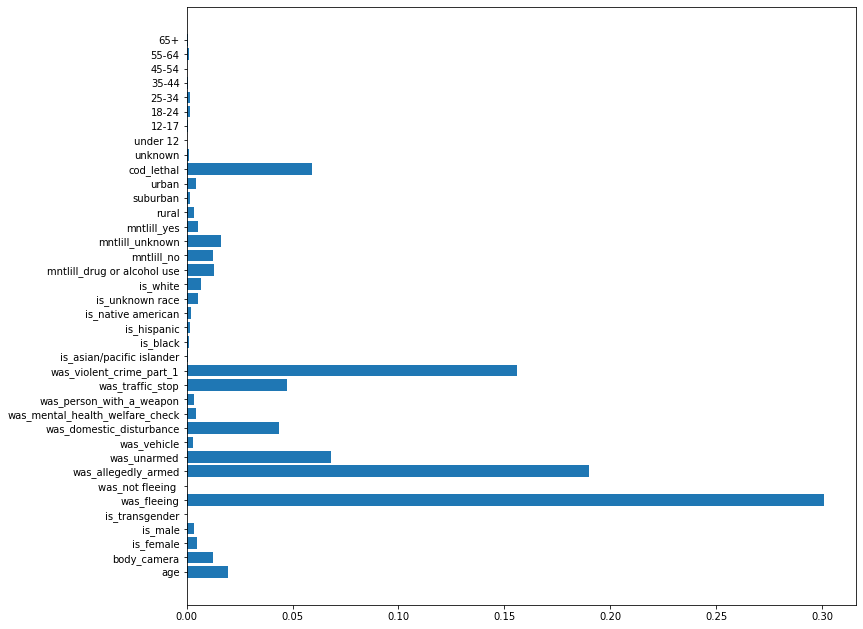

In [ ]:
feature_names = list(train2.columns)

plt.figure(figsize=(12, 11))
plt.barh(feature_names, rf.feature_importances_)



### Top Features according to Random Forest: (ordered greatest to least)
was_fleeing<br>
was_allegedly_armed<br>
was_violent_crime<br>
was_unarmed<br>
age


In [ ]:
train2.columns

Index(['age', 'body_camera', 'is_female', 'is_male', 'is_transgender',
       'was_fleeing', 'was_not fleeing ', 'was_allegedly_armed', 'was_unarmed',
       'was_vehicle', 'was_domestic_disturbance',
       'was_mental_health_welfare_check', 'was_person_with_a_weapon',
       'was_traffic_stop', 'was_violent_crime_part_1',
       'is_asian/pacific islander', 'is_black', 'is_hispanic',
       'is_native american', 'is_unknown race', 'is_white',
       'mntlill_drug or alcohol use', 'mntlill_no', 'mntlill_unknown',
       'mntlill_yes', 'rural', 'suburban', 'urban', 'cod_lethal', 'unknown',
       'under 12', '12-17', '18-24', '25-34', '35-44', '45-54', '55-64',
       '65+'],
      dtype='object')

In [ ]:
# make predictions
y_pred = rf.predict(train2)

# estimate probability
y_pred_proba = rf.predict_proba(train2)


#Compute accuracy
train_accuracy = round(rf.score(train2, y_train),2)
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(train2, y_train)))


Accuracy of random forest classifier on training set: 0.70


In [ ]:
# run classification report
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

         0.0       0.71      0.70      0.71      2466
         1.0       0.70      0.70      0.70      2368

    accuracy                           0.70      4834
   macro avg       0.70      0.70      0.70      4834
weighted avg       0.70      0.70      0.70      4834



In [ ]:
# fit the model on validate
rf.fit(validate2, y_validate)

# make predictions
y_pred_val = rf.predict(validate2)

# estimate probability
y_pred_val_proba = rf.predict_proba(validate2)

#Compute accuracy
validate_accuracy = round(rf.score(validate2, y_validate),2)
print('Accuracy of random forest classifier on validate set: {:.2f}'
     .format(rf.score(validate2, y_validate)))


Accuracy of random forest classifier on validate set: 0.72


In [ ]:
# run classification report on validate
print(classification_report(y_validate, y_pred_val))

              precision    recall  f1-score   support

         0.0       0.72      0.72      0.72      1053
         1.0       0.71      0.71      0.71      1020

    accuracy                           0.72      2073
   macro avg       0.72      0.72      0.72      2073
weighted avg       0.72      0.72      0.72      2073



In [ ]:
def get_metrics_bin(clf, X, y):
    '''
    get_metrics_bin will take in a sklearn classifier model, an X and a y variable and utilize
    the model to make a prediction and then gather accuracy, class report evaluations

    return:  a classification report as a pandas DataFrame
    '''
    y_pred = clf.predict(X)
    accuracy = clf.score(X, y)
    conf = confusion_matrix(y, y_pred)
    class_report = pd.DataFrame(classification_report(y, y_pred, output_dict=True)).T
    tpr = conf[1][1] / conf[1].sum()
    fpr = conf[0][1] / conf[0].sum()
    tnr = conf[0][0] / conf[0].sum()
    fnr = conf[1][0] / conf[1].sum()
    print(f'''
    The accuracy for our model is {accuracy:.4}
    The True Positive Rate is {tpr:.3}, The False Positive Rate is {fpr:.3},
    The True Negative Rate is {tnr:.3}, and the False Negative Rate is {fnr:.3}
    ''')
    return class_report

In [ ]:
# X = validate2
# clf = RandomForestClassifier
# print('Model #1: min samples 3, max depth 3')
# class_report_val = get_metrics_bin(clf, validate2, y_validate)
# # print('-------------------------------------------\n Model #2: min samples 3, max_depth 3\n')
# # class_report_val1 = get_metrics_bin(clf1, X_val, y_val)

### Takeaways on Random Forest Classifier Model (max depth 3):

Baseline accuracy = 51% <br>
Accuracy on Train = 70% <br>
Accuracy on Validate = 72%

In [ ]:

#begin building a dataframe to record accuracy
metric_df = pd.DataFrame(data=[{
    'model': 'random forest', 
    'baseline_accuracy': round(baseline_accuracy,2),
    'train_accuracy': round(train_accuracy, 2),
    'validate_accuracy': round(validate_accuracy, 2)}])
metric_df

,model,baseline_accuracy,train_accuracy,validate_accuracy
0,random forest,0.51,0.7,0.72


### Naive Bayes
Naïve Bayes Classifier is one of the simple and most effective Classification algorithms which helps in building fast machine learning models that can make quick predictions. It is a probabilistic classifier, which means it predicts on the basis of the probability of an object. It's biggest limitation is that it implicitly assumes that all the attributes are mutually independent. (In real life, it's almost impossible that we get a set of predictors that are completely independent or one another.)

In [ ]:
from sklearn.naive_bayes import CategoricalNB

# make the model
classifier = CategoricalNB()

# fit the model
classifier.fit(train2, y_train)

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


CategoricalNB()

In [ ]:
# make predictions on train
nb_y_pred  =  classifier.predict(train2)

# make predictions on validate
nb_y_val_pred  =  classifier.predict(validate2)

In [ ]:
# evaluate model on train
from sklearn.metrics import confusion_matrix,accuracy_score
cm_train = confusion_matrix(y_train, nb_y_pred)
ac_train = accuracy_score(y_train,nb_y_pred)

In [ ]:
# evaluate model on validate
cm_validate = confusion_matrix(y_validate, nb_y_val_pred)
ac_validate = accuracy_score(y_validate,nb_y_val_pred)

In [ ]:
print('Accuracy of Naive Bayes Gaussian Classifier on train set: {:.2f}'.format(ac_train))
print('Accuracy of Naive Bayes Gaussian Classifier on validate set: {:.2f}'.format(ac_validate))

Accuracy of Naive Bayes Gaussian Classifier on train set: 0.70
Accuracy of Naive Bayes Gaussian Classifier on validate set: 0.68


### Takeaways on Naive Bayes Model:
Baseline accuracy = 51% <br>
Accuracy on Train = 70% <br>
Accuracy on Validate = 68%

### Dataframe Summarizing Models

In [ ]:
# append dataframe to record accuracy on Naive Bayes
metric_df = metric_df.append({
    'model': 'naive bayes', 
    'baseline_accuracy': round(baseline_accuracy,2),
    'train_accuracy': round(ac_train, 2),
    'validate_accuracy':round(ac_validate,2)}, ignore_index=True)
  


metric_df

,model,baseline_accuracy,train_accuracy,validate_accuracy
0,random forest,0.51,0.7,0.72
1,naive bayes,0.51,0.7,0.68


### GridSearchCV

In [ ]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import uniform

In [ ]:
# Create a parameter dictionary for the model, {'parameter': [list of settings]}
parameters = [
    {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1],
    'shuffle': [True, False],
    'verbose': [0, 1, 5, 10],
    'class_weight': [None, 'balanced'],
    },
]
# Created variable model which holds the KNN model
model = SGDClassifier()
# Create grid_search model, looking at recall
grid_search = GridSearchCV(model,
                           param_grid=parameters,
                           scoring='accuracy',
                           )
# Create variable r that hold the FIT grid_search
r = grid_search.fit(X_train[f_feature], y_train)
scores = r.cv_results_
lm = r.best_estimator_

Norm: 0.21, NNZs: 15, Bias: 0.470136, T: 38670, Avg. loss: 0.968512
Total training time: 0.03 seconds.
-- Epoch 11
Norm: 0.21, NNZs: 15, Bias: 0.468809, T: 42537, Avg. loss: 0.973061
Total training time: 0.03 seconds.
Convergence after 11 epochs took 0.03 seconds
-- Epoch 1
Norm: 0.16, NNZs: 15, Bias: -0.381230, T: 3867, Avg. loss: 1.771205
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.18, NNZs: 15, Bias: -0.385106, T: 7734, Avg. loss: 0.985514
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 0.19, NNZs: 15, Bias: -0.388341, T: 11601, Avg. loss: 0.980347
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 0.20, NNZs: 15, Bias: -0.390798, T: 15468, Avg. loss: 0.959403
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 0.20, NNZs: 15, Bias: -0.393162, T: 19335, Avg. loss: 0.966443
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 0.21, NNZs: 15, Bias: -0.394388, T: 23202, Avg. loss: 0.944466
Total training time: 0.01 seconds.
-- Epoch 7
Norm: 0.21, NNZs: 15, Bias: -0.395835

In [ ]:
# Returns max value of the mean test score 
max(scores['mean_test_score'])

0.6876281684833458

In [ ]:
# loop that runs all of the possible parameter configurations from the parameter dictionary above
for mean_score, params in sorted(list(zip(scores["mean_test_score"], scores["params"])),key = lambda x: x[0]):
     print(f'Best parameters for SGD Classifier are {params} with a score of {mean_score}')

Best parameters for SGD Classifier are {'alpha': 1, 'class_weight': 'balanced', 'shuffle': False, 'verbose': 0} with a score of 0.502272936511505
Best parameters for SGD Classifier are {'alpha': 1, 'class_weight': 'balanced', 'shuffle': False, 'verbose': 1} with a score of 0.502272936511505
Best parameters for SGD Classifier are {'alpha': 1, 'class_weight': 'balanced', 'shuffle': False, 'verbose': 5} with a score of 0.502272936511505
Best parameters for SGD Classifier are {'alpha': 1, 'class_weight': 'balanced', 'shuffle': False, 'verbose': 10} with a score of 0.502272936511505
Best parameters for SGD Classifier are {'alpha': 1, 'class_weight': 'balanced', 'shuffle': True, 'verbose': 1} with a score of 0.5163419767439371
Best parameters for SGD Classifier are {'alpha': 1, 'class_weight': None, 'shuffle': True, 'verbose': 0} with a score of 0.5171795547048459
Best parameters for SGD Classifier are {'alpha': 1, 'class_weight': None, 'shuffle': True, 'verbose': 1} with a score of 0.518409

Best parameters for SGD Classifier are {'alpha': 0.01, 'class_weight': None, 'shuffle': True, 'verbose': 5} using f_feature from Select K Best


In [ ]:
# Create a parameter dictionary for the model, {'parameter': [list of settings]}
parameters = [
    {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1],
    'shuffle': [True, False],
    'verbose': [0, 1, 5, 10],
    'class_weight': [None, 'balanced'],
    },
]
# Created variable model which holds the KNN model
model = SGDClassifier()
# Create grid_search model, looking at recall
grid_search = GridSearchCV(model,
                           param_grid=parameters,
                           scoring='accuracy',
                           )
# Create variable r that hold the FIT grid_search
r = grid_search.fit(X_train[rfe_list], y_train)
scores = r.cv_results_
lm = r.best_estimator_

Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.24, NNZs: 15, Bias: 0.002891, T: 11601, Avg. loss: 0.944488
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.24, NNZs: 15, Bias: -0.003225, T: 15468, Avg. loss: 0.944357
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.24, NNZs: 15, Bias: -0.007925, T: 19335, Avg. loss: 0.944257
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 0.24, NNZs: 15, Bias: -0.011743, T: 23202, Avg. loss: 0.944177
Total training time: 0.01 seconds.
-- Epoch 7
Norm: 0.24, NNZs: 15, Bias: -0.014958, T: 27069, Avg. loss: 0.944110
Total training time: 0.01 seconds.
Convergence after 7 epochs took 0.01 seconds
-- Epoch 1
Norm: 0.23, NNZs: 15, Bias: 0.029448, T: 3867, Avg. loss: 0.951113
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.23, NNZs: 15, Bias: 0.013861, T: 7734, Avg. loss: 0.948007
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.23, NNZs: 15, Bias: 0.005133, T: 11601, Avg. loss: 0.947681
Total training time: 0.00 seconds.
-- Epo

In [ ]:
# Returns max value of the mean test score 
max(scores['mean_test_score'])

0.7006613697140203

In [ ]:
# loop that runs all of the possible parameter configurations from the parameter dictionary above
for mean_score, params in sorted(list(zip(scores["mean_test_score"], scores["params"])),key = lambda x: x[0]):
     print(f'Best parameters for SGD Classifier are {params} with a score of {mean_score}')

Best parameters for SGD Classifier are {'alpha': 1, 'class_weight': 'balanced', 'shuffle': True, 'verbose': 10} with a score of 0.49793388872117345
Best parameters for SGD Classifier are {'alpha': 1, 'class_weight': None, 'shuffle': True, 'verbose': 10} with a score of 0.4989680148845654
Best parameters for SGD Classifier are {'alpha': 1, 'class_weight': 'balanced', 'shuffle': True, 'verbose': 0} with a score of 0.5018635681420628
Best parameters for SGD Classifier are {'alpha': 1, 'class_weight': None, 'shuffle': True, 'verbose': 5} with a score of 0.5148935578008011
Best parameters for SGD Classifier are {'alpha': 1, 'class_weight': None, 'shuffle': True, 'verbose': 1} with a score of 0.5287465662943384
Best parameters for SGD Classifier are {'alpha': 1, 'class_weight': None, 'shuffle': True, 'verbose': 0} with a score of 0.5401262361875644
Best parameters for SGD Classifier are {'alpha': 1, 'class_weight': 'balanced', 'shuffle': True, 'verbose': 5} with a score of 0.5502752317149151

Best parameters for SGD Classifier are {'alpha': 0.0001, 'class_weight': 'balanced', 'shuffle': True, 'verbose': 1} using rfe_list froms RFE


In [ ]:
# Create a parameter dictionary for the model, {'parameter': [list of settings]}
parameters = [
    {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1],
    'shuffle': [True, False],
    'verbose': [0, 1, 5, 10],
    'class_weight': [None, 'balanced'],
    },
]
# Created variable model which holds the KNN model
model = SGDClassifier()
# Create grid_search model, looking at recall
grid_search = GridSearchCV(model,
                           param_grid=parameters,
                           scoring='accuracy',
                           )
# Create variable r that hold the FIT grid_search
r = grid_search.fit(X_train[combo_feats], y_train)
scores = r.cv_results_
lm = r.best_estimator_

Norm: 0.17, NNZs: 19, Bias: -0.296740, T: 3867, Avg. loss: 1.633305
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 0.18, NNZs: 19, Bias: -0.302793, T: 7734, Avg. loss: 0.989102
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 0.19, NNZs: 19, Bias: -0.305229, T: 11601, Avg. loss: 0.970797
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 0.19, NNZs: 19, Bias: -0.308072, T: 15468, Avg. loss: 0.967018
Total training time: 0.10 seconds.
-- Epoch 5
Norm: 0.19, NNZs: 19, Bias: -0.310324, T: 19335, Avg. loss: 0.948538
Total training time: 0.10 seconds.
-- Epoch 6
Norm: 0.20, NNZs: 19, Bias: -0.312387, T: 23202, Avg. loss: 0.967271
Total training time: 0.11 seconds.
-- Epoch 7
Norm: 0.20, NNZs: 19, Bias: -0.313986, T: 27069, Avg. loss: 0.962590
Total training time: 0.11 seconds.
-- Epoch 8
Norm: 0.20, NNZs: 19, Bias: -0.315232, T: 30936, Avg. loss: 0.958550
Total training time: 0.11 seconds.
-- Epoch 9
Norm: 0.20, NNZs: 19, Bias: -0.316054, T: 34803, Avg. loss: 0.954092
Total trainin

In [ ]:
# Returns max value of the mean test score 
max(scores['mean_test_score'])

0.7049999892947603

In [ ]:
# loop that runs all of the possible parameter configurations from the parameter dictionary above
for mean_score, params in sorted(list(zip(scores["mean_test_score"], scores["params"])),key = lambda x: x[0]):
     print(f'Best parameters for SGD Classifier are {params} with a score of {mean_score}')

Best parameters for SGD Classifier are {'alpha': 1, 'class_weight': None, 'shuffle': True, 'verbose': 10} with a score of 0.5022772186074196
Best parameters for SGD Classifier are {'alpha': 1, 'class_weight': 'balanced', 'shuffle': False, 'verbose': 0} with a score of 0.5028934122095401
Best parameters for SGD Classifier are {'alpha': 1, 'class_weight': 'balanced', 'shuffle': False, 'verbose': 1} with a score of 0.5028934122095401
Best parameters for SGD Classifier are {'alpha': 1, 'class_weight': 'balanced', 'shuffle': False, 'verbose': 5} with a score of 0.5028934122095401
Best parameters for SGD Classifier are {'alpha': 1, 'class_weight': 'balanced', 'shuffle': False, 'verbose': 10} with a score of 0.5028934122095401
Best parameters for SGD Classifier are {'alpha': 1, 'class_weight': None, 'shuffle': False, 'verbose': 0} with a score of 0.5134414990761378
Best parameters for SGD Classifier are {'alpha': 1, 'class_weight': None, 'shuffle': False, 'verbose': 1} with a score of 0.51344

Best parameters for SGD Classifier are {'alpha': 0.01, 'class_weight': None, 'shuffle': True, 'verbose': 0} using combo_feats


In [ ]:
# Build 3 models using Select K Best features, RFE feature, and a combination of the of the features minimizing multicolinearity
sgd_skb = SGDClassifier(alpha=0.01, shuffle=True, verbose=5, class_weight=None)
sgd_rfe = SGDClassifier(alpha=0.0001, class_weight='balanced', shuffle=True, verbose=1)
sgd_cf = SGDClassifier(alpha=0.01, class_weight=None, shuffle=True, verbose=0)

# fitting the SGD Classifiers with the X_train with the corresponding features
sgd_skb.fit(X_train[f_feature], y_train)
sgd_rfe.fit(X_train[rfe_list], y_train)
sgd_cf.fit(X_train[combo_feats], y_train)

# Model SKB predictions
y_pred_sgd_skb = sgd_skb.predict(X_train[f_feature])
y_pred_val_sgd_skb = sgd_skb.predict(X_validate[f_feature])

# Model RFE predictions
y_pred_sgd_rfe = sgd_rfe.predict(X_train[rfe_list])
y_pred_val_sgd_rfe = sgd_rfe.predict(X_validate[rfe_list])

# Model Combo Features
y_pred_sgd_cf = sgd_cf.predict(X_train[combo_feats])
y_pred_val_sgd_cf = sgd_cf.predict(X_validate[combo_feats])

# Measure accuracy of the select k best feature model
accuracy_train_sgd_skb = sgd_skb.score(X_train[f_feature], y_train)
accuracy_val_sgd_skb = sgd_skb.score(X_validate[f_feature], y_validate)

# Measure accuracy of the RFE feature model
accuracy_train_sgd_rfe = sgd_rfe.score(X_train[rfe_list], y_train)
accuracy_val_sgd_rfe = sgd_rfe.score(X_validate[rfe_list], y_validate)

# Measure accuracy of the CF feature model
accuracy_train_sgd_cf = sgd_cf.score(X_train[combo_feats], y_train)
accuracy_val_sgd_cf = sgd_cf.score(X_validate[combo_feats], y_validate)

-- Epoch 1
Norm: 8.19, NNZs: 15, Bias: 1.566128, T: 4834, Avg. loss: 36.740200
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 6.38, NNZs: 15, Bias: 1.746795, T: 9668, Avg. loss: 5.345328
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 5.46, NNZs: 15, Bias: 1.552385, T: 14502, Avg. loss: 3.248108
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 4.72, NNZs: 15, Bias: 1.478759, T: 19336, Avg. loss: 2.517909
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 4.29, NNZs: 15, Bias: 1.452855, T: 24170, Avg. loss: 2.093600
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 3.91, NNZs: 15, Bias: 1.336040, T: 29004, Avg. loss: 1.840907
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 3.68, NNZs: 15, Bias: 1.275031, T: 33838, Avg. loss: 1.622404
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 3.44, NNZs: 15, Bias: 1.180316, T: 38672, Avg. loss: 1.487418
Total training time: 0.01 seconds.
-- Epoch 9
Norm: 3.19, NNZs: 15, Bias: 1.133253, T: 43506, Avg. loss: 1.425202
Total trai

In [ ]:
# Add accuracy of the SKB model to the metric_df
metric_df = metric_df.append({
    'model': 'SGD Classifier SKB Features', 
    'baseline_accuracy': round(baseline_accuracy,2),
    'train_accuracy': round(accuracy_train_sgd_skb, 2),
    'validate_accuracy':round(accuracy_val_sgd_skb,2)}, ignore_index=True)


In [ ]:
# Add accuracy of the RFE model to the metric_df
metric_df = metric_df.append({
    'model': 'SGD Classifier RFE Features', 
    'baseline_accuracy': round(baseline_accuracy,2),
    'train_accuracy': round(accuracy_train_sgd_rfe, 2),
    'validate_accuracy':round(accuracy_val_sgd_rfe,2)}, ignore_index=True)

In [ ]:
# Add accuracy of the CF model to the metric_df
metric_df = metric_df.append({
    'model': 'SGD Classifier CF Features', 
    'baseline_accuracy': round(baseline_accuracy,2),
    'train_accuracy': round(accuracy_train_sgd_cf, 2),
    'validate_accuracy':round(accuracy_val_sgd_cf,2)}, ignore_index=True)

In [ ]:
metric_df

,model,baseline_accuracy,train_accuracy,validate_accuracy
0,random forest,0.51,0.70,0.72
1,naive bayes,0.51,0.70,0.68
2,SGD Classifier SKB Features,0.51,0.68,0.69
3,SGD Classifier RFE Features,0.51,0.69,0.68
5,SGD Classifier CF Features,0.51,0.67,0.67


___
# KNN 
## Train

In [ ]:
def get_metrics(mod, X, y):
    """
    get_metrics returns the baseline accuracy score 
    along with the current model's accuracy score for comparison 
    along with a table of precision/recall/f1-score/support percentages of the model
    """
    baseline_accuracy = (train.alleged_threat_lvl == 0).mean()
    y_pred = mod.predict(X)
    accuracy = mod.score(X, y)
    conf = confusion_matrix(y, y_pred)
    prfs = pd.DataFrame(precision_recall_fscore_support(y, y_pred), index=['precision', 'recall', 'f1-score', 'support'])
    
    print(f'''
    BASELINE accuracy is: {baseline_accuracy:.2%}
    The accuracy for our model is: {accuracy:.5%} 
    ''')
    return conf, prfs

### Select K Best

In [ ]:
# Create KNN object (thing)
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')
# fit the model (thing)
knn.fit(train[f_feature], y_train)

KNeighborsClassifier()

In [ ]:
# Use the model (thing)
# Select k Best features
get_metrics(knn, train[f_feature], y_train)


    BASELINE accuracy is: 51.01%
    The accuracy for our model is: 74.18287% 
    


(array([[1773,  693],
        [ 555, 1813]]),
                      0            1
 precision     0.761598     0.723464
 recall        0.718978     0.765625
 f1-score      0.739675     0.743947
 support    2466.000000  2368.000000)

### RFE

In [ ]:
# Create KNN object (thing)
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')
# fit the model (thing)
knn.fit(train[rfe_list], y_train)

KNeighborsClassifier()

In [ ]:
# Use the model (thing)
# RFE features
get_metrics(knn, train[rfe_list], y_train)


    BASELINE accuracy is: 51.01%
    The accuracy for our model is: 68.61812% 
    


(array([[1544,  922],
        [ 595, 1773]]),
                      0            1
 precision     0.721833     0.657885
 recall        0.626115     0.748733
 f1-score      0.670575     0.700375
 support    2466.000000  2368.000000)

### Combo

In [ ]:
# Create KNN object (thing)
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')
# fit the model (thing)
knn.fit(train[combo_feats], y_train)

KNeighborsClassifier()

In [ ]:
# Use the model (thing)
# combo features
get_metrics(knn, train[combo_feats], y_train)


    BASELINE accuracy is: 51.01%
    The accuracy for our model is: 75.69301% 
    


(array([[1824,  642],
        [ 533, 1835]]),
                      0            1
 precision     0.773865     0.740816
 recall        0.739659     0.774916
 f1-score      0.756376     0.757482
 support    2466.000000  2368.000000)

## Validate

### Select K Best

In [ ]:
# Create KNN object (thing)
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')
# fit the model (thing)
knn.fit(train[f_feature], y_train)

KNeighborsClassifier()

In [ ]:
# Use the model (thing)
# Select k Best features
get_metrics(knn, validate[f_feature], y_validate)


    BASELINE accuracy is: 51.01%
    The accuracy for our model is: 65.60540% 
    


(array([[684, 369],
        [344, 676]]),
                      0            1
 precision     0.665370     0.646890
 recall        0.649573     0.662745
 f1-score      0.657376     0.654722
 support    1053.000000  1020.000000)

### RFE

In [ ]:
# Create KNN object (thing)
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')
# fit the model (thing)
knn.fit(train[rfe_list], y_train)

KNeighborsClassifier()

In [ ]:
# Use the model (thing)
# RFE features
get_metrics(knn, validate[rfe_list], y_validate)


    BASELINE accuracy is: 51.01%
    The accuracy for our model is: 66.85962% 
    


(array([[638, 415],
        [272, 748]]),
                      0            1
 precision     0.701099     0.643164
 recall        0.605888     0.733333
 f1-score      0.650025     0.685295
 support    1053.000000  1020.000000)

### Combo Features

In [ ]:
# Create KNN object (thing)
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')
# fit the model (thing)
knn.fit(train[combo_feats], y_train)

KNeighborsClassifier()

In [ ]:
# Use the model (thing)
# Combo features
get_metrics(knn, validate[combo_feats], y_validate)


    BASELINE accuracy is: 51.01%
    The accuracy for our model is: 67.24554% 
    


(array([[698, 355],
        [324, 696]]),
                      0            1
 precision     0.682975     0.662226
 recall        0.662868     0.682353
 f1-score      0.672771     0.672139
 support    1053.000000  1020.000000)

**KNN using Combo feats is running best with Train=76% & Validate=67.24%**

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=258e71fc-cf2b-48c3-8461-70ecd9787aa1' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>